In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('savedResults/run_13/allTrainLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   5.00000000e-02   6.00000000e-02   7.00000000e-02
    8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  1.00000000e+01   4.43987445e-05   5.15586735e-05   3.77558388e-05
    3.50113405e-05   3.66879978e-05   3.16466498e-05   3.81411490e-05
    4.12081530e-05   4.52359013e-05   4.53767890e-05]
 [  2.00000000e+01   1.49752620e-04   1.15894737e-04   1.22978380e-04
    7.09942907e-05   6.92982398e-05   8.39871660e-05   6.98346377e-05
    8.46352523e-05   7.39299133e-05   8.28537931e-05]
 [  3.00000000e+01   2.70547447e-04   2.21013446e-04   1.71727745e-04
    1.32779434e-04   1.26517127e-04   1.29148125e-04   1.20180756e-04
    1.13093626e-04   9.19100219e-05   1.24445934e-04]
 [  4.00000000e+01   6.31797258e-04   3.38097764e-04   2.07350538e-04
    1.57091095e-04   3.10362933e-04   1.59860713e-04   1.29995861e-04
    1.65810775e-04   1.10842250e-04   1.31744064e-04]
 [  5.00000000e+01   1.2340767

In [2]:
# Only use this for run 1, where the data about the sequence length and weight std was not stored with the losses

# err = np.zeros((len(losses) + 1, len(losses[0]) + 1))

# nPoints = [10,20,30,40,50,60]
# wsd2 = [0.03, 0.06, 0.09, 0.12, 0.15]

# for i in range(len(losses)):
#     err[i+1][0] = nPoints[i]
#     for j in range(len(losses[0])):
#         err[0][j + 1] = wsd2[j]
#         err[i+1][j+1] = losses[i][j]

# print(err)

In [7]:
# 
err = losses

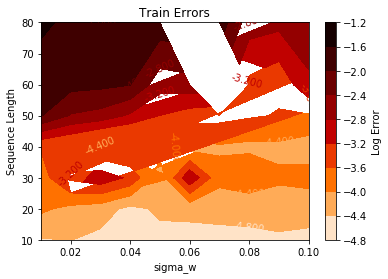

In [8]:
%matplotlib inline

import matplotlib.cm as cm
plt.figure()
cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(err[0][1:], err[...,0][1:], np.log10(err[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Train Errors")
plt.xlabel("sigma_w")
plt.ylabel("Sequence Length")

In [4]:
with open('savedResults/run_13/allTestLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   5.00000000e-02   6.00000000e-02   7.00000000e-02
    8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  1.00000000e+01   3.72935168e-05   4.05293433e-05   3.16250776e-05
    2.76430913e-05   3.09590763e-05   2.92337886e-05   2.55703394e-05
    3.53569914e-05   3.32037023e-05   3.34537216e-05]
 [  2.00000000e+01   1.19525169e-04   7.70545185e-05   5.98131930e-05
    3.10517963e-05   4.62119991e-05   4.98950007e-05   6.25215774e-05
    4.68716909e-05   6.59615571e-05   5.23207684e-05]
 [  3.00000000e+01   1.53940107e-04   7.71941764e-04   1.20356499e-03
    5.19571362e-04   5.76851045e-05   1.37289615e-03   1.24606271e-04
    2.14221906e-04   1.13420526e-04   1.41950753e-04]
 [  4.00000000e+01   2.70402500e-04   1.90868214e-04   8.32070672e-05
    6.72478559e-05   1.42865031e-04   6.53217011e-05   9.09041515e-05
    8.04831999e-05   8.37161122e-05   6.22657127e-05]
 [  5.00000000e+01   1.0609274

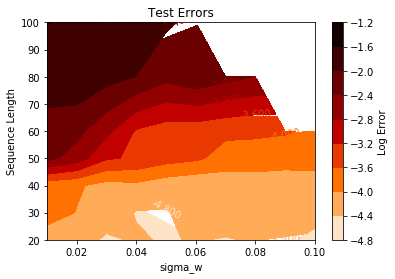

In [20]:
import math
import matplotlib.cm as cm
merged = np.concatenate((err[0:6], losses[1:]), axis=0)
indices = range(len(merged[0]))
indices.sort(key=merged[0].__getitem__)
sorted = np.zeros((len(merged[...,0]), len(merged[0])))
for i in range(len(indices)):
    sorted[...,i] = merged[...,indices[i]]


cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(merged[0][1:], merged[...,0][1:], np.log10(merged[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Test Errors")
plt.xlabel("sigma_w")
plt.ylabel("Sequence Length")
plt.show()